# Øving 5: Vanlige sannsynlighetsmodeller - Poisson og eksponential

Dette er en Jupyter-notatbok. Se i Python-ressursene i venstremenyen i emnet i Blackboard hvis du ikke vet helt hvordan du bruker notatboken! 

**Kortversjon:** dobbeltklikk på en celle for å komme i edit-mode, gjør endringene din og kjør koden i en celle med shift-enter (eller velge play-knappen i vertøylinja over). For å kjøre alt i notatboka kan du trykke shift-enter på alle celler (en etter en), eller gå i menyen for hubben (til venstre) og velge Run-"Run all cells".

## Spørsmål 3

La $X$ være en poissonfordelt stokastisk variabel med forventning $\lambda t$.

Regn ut:

a) P($X$=a) 

b) P($X \le$ b) 

c) P(c<$X$<d) 

Her har du fått dine unike verdier av $\lambda t$, $a$, $b$, $c$ og $d$ i oppgaven i stack

Vi fikk verdiene $\lambda t=6.2$, $a$=10, $b$=5, $c$=3 og $d$=6 og skal bruke disse i løsningen under. Du bruker de verdiene du fikk!

Først - vi trenger statistikk-modulen fra scipy-pakke, som vi laster slik:

In [1]:
from scipy import stats



### 3a

Anta at du skal regne ut $P(X=10)$, da bruker du funksjonen stats.poisson.pmf som tar to argumenter: først tallet som vi skal være lik 10, deretter $\lambda t$.

In [2]:
stats.poisson.pmf(10,6.2)

0.04693837759360656

### 3b 

Anta at du skal regne ut $P(X \le 5)$. Du skal bruke funksjonen stats.poisson.cdf som tar de samme to argumentene som over, og regner ut sannsynlighet for å være mindre eller lik det første tallet.

In [3]:
stats.poisson.cdf(5,6.2)

0.41411303858437765

### 3c

Her skal vi bruke den samme funksjonen som i 3b, men nå skal vi sannsynligheten for å ligge i et intervall fra c til og med d. Vi har lært følgende regel i kapittel 4 (side 143 i læreboka)
$$P(c < X\le d)=P(X \le d)-P(X \le c)$$ 

Anta at du skal regne ut $P(3<X \le 6)=P(X \le 6)-P(X\le 3)$.

In [4]:
stats.poisson.cdf(6,6.2)-stats.poisson.cdf(3,6.2)

0.43998398239640785

Du kunne også ha summert punktsannsynligheter for verdiene i intervallet, spesielt her når vi har bare verdiene 4, 5 og 6 som da skulle ha regnet sannsynlighet for og summert.

## Spørsmål 4

La $X$ være antall hendelser i et område på 21 kvadratmeter, der hendelser skjer ifølge en poissonprosess
med rate $\lambda$ hendelser per kvadratmeter.

For hvilken tallverdi $x$ er sannsynligheten $P(X = x$) størst? Tallet er et heltall.

Anta at verdiene du fikk oppgitt at $\lambda=0.55$. Forventningverdien i poissonfordelingen blir da $0.55\cdot 21=11.55$.
(Her er det ikke pr tid men pr areal, men vi kan jo tenke at vi bruker $t$ for areal.)

Vi trenger to pakker: statistikk-modulen fra scipy (som i spørsmål 3), og matlibplot.pyplot for å plotte.

Vi starter med å importere disse.

In [5]:
from scipy import stats
import matplotlib.pyplot as plt

Hva er de mulige verdiene $X$ kan ta? For poissonfordeling er det 0 og alle positive heltall. Men, vi vil jo ikke sjekke alle verdier opp til uendelig. Her kan man prøve seg frem litt og vi kan tenke slik: hva om vi lar nedre grense være forveningsverdien minus tre standardavvik, og så øvre grense være forveningsverdien pluss tre standardavvik? For poissonfordelingen er variansen lik forventningsverdien, så da blir det $11.55-3\cdot \sqrt{11.55}\approx 1 $ og $11.55+3\cdot \sqrt{11.55}\approx 22$. Det er helt fint om du prøver deg frem (går jo helt fint med 0 som nedre grense) - det viktigste er at vi ser på plottet under at vi har med en topp.

Vi lager en vektor med disse tallene (det gjør vi med range-funksjonen under - husk at øvre grense for range er +1) 

In [6]:
xverdier=range(0,23)

og så skal vi regne ut punktsannsynligheten for disse verdiene med funksjonen stats.binom.pmf, og første argument kan godt være en vektor (da regnes punktsannsynligheten ut for alle elementene i vektoren).

In [7]:
stats.poisson.pmf(xverdier, 11.55)

array([9.63604310e-06, 1.11296298e-04, 6.42736120e-04, 2.47453406e-03,
       7.14521711e-03, 1.65054515e-02, 3.17729942e-02, 5.24254404e-02,
       7.56892295e-02, 9.71345112e-02, 1.12190360e-01, 1.17799878e-01,
       1.13382383e-01, 1.00735886e-01, 8.31071063e-02, 6.39924719e-02,
       4.61945656e-02, 3.13851314e-02, 2.01387926e-02, 1.22422660e-02,
       7.06990864e-03, 3.88844975e-03, 2.04143612e-03])

Vi kan se om vi finner det største tallet blant alle disse punktsannsynlighetene, men det er lettere å se hvis vi lager et sannsynlighetshistogram over tallene. Det gjør vi slik:

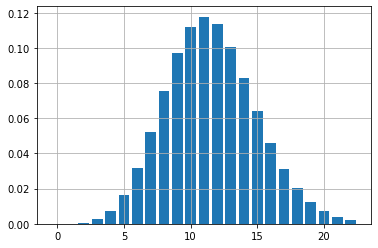

In [8]:
fig, ax = plt.subplots()
ax.bar(xverdier, stats.poisson.pmf(xverdier, 11.55))
ax.grid()

For en poissonfordeling med $\lambda \cdot 21=0.55\cdot 21=11.55$ ble den høyeste punktsannynlighet for $x=11$. 

## Ekstra - finne maksimum av en vektor

Hvis du har lyst til å bruke Python til å finne maksimum av en vektor trenger du også numpy-pakken, og kan gjøre slik. Stemmer det med hva du fant ved å se på figuren?


In [9]:
import numpy as np
from scipy import stats

x= np.arange(23)
y= stats.poisson.pmf(x, 11.55)
# vi kan bruker numpy funksjoner til å lett finne maksimum
max_x = x[np.where(y == y.max())]
print(max_x[0])

11
